In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/content/Mobile Price Prediction Datatset.csv")
print(df.head())

   Unnamed: 0                         Brand me  Ratings  RAM    ROM  \
0           0            LG V30+ (Black, 128 )      4.3  4.0  128.0   
1           1                       I Kall K11      3.4  6.0   64.0   
2           2                     Nokia 105 ss      4.3  4.0    4.0   
3           3  Samsung Galaxy A50 (White, 64 )      4.4  6.0   64.0   
4           4       POCO F1 (Steel Blue, 128 )      4.5  6.0  128.0   

   Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  Price  
0         6.00           48       13.0           4000  24999  
1         4.50           48       12.0           4000  15999  
2         4.50           64       16.0           4000  15000  
3         6.40           48       15.0           3800  18999  
4         6.18           35       15.0           3800  18999  


In [11]:
encoder = LabelEncoder()
df["brand_encoded"] = encoder.fit_transform(df["Brand me"])
df.head()

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price,brand_encoded
0,0,"LG V30+ (Black, 128 )",4.3,4.0,128.0,6.00,48,13.0,4000,24999,184
1,1,I Kall K11,3.4,6.0,64.0,4.50,48,12.0,4000,15999,82
2,2,Nokia 105 ss,4.3,4.0,4.0,4.50,64,16.0,4000,15000,250
3,3,"Samsung Galaxy A50 (White, 64 )",4.4,6.0,64.0,6.40,48,15.0,3800,18999,349
4,4,"POCO F1 (Steel Blue, 128 )",4.5,6.0,128.0,6.18,35,15.0,3800,18999,303


In [12]:
inp= df[['RAM', 'ROM', 'Battery_Power', 'Primary_Cam',
'Selfi_Cam', 'Mobile_Size']]
out= df['Price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
inp, out, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of the training data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the imputed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [20]:
LR = LinearRegression()
LR.fit(X_train_scaled, y_train)

LinearRegression()

In [21]:
y_pred = LR.predict(X_test_scaled)

In [22]:
y_pred = LR.predict(X_test_scaled)

In [23]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 2110303314.7211406
R2 Score: 0.09233208241445612


In [24]:
new_mobile = [[8, 128, 5000, 48, 16, 6.5]]
new_mobile_scaled = scaler.transform(new_mobile)
predicted_price = LR.predict(new_mobile_scaled)
print("Predicted Price:", predicted_price[0])

Predicted Price: 44843.908136900565


In [30]:
test_data = X_test.copy()
test_data["predicted_price"] = y_pred
test_data["actual_price"] = y_test
test_data

,RAM,ROM,Battery_Power,Primary_Cam,Selfi_Cam,Mobile_Size,predicted_price,actual_price
611,8.0,256.0,4440,48,13.0,6.44,63552.073048,37990
823,6.0,32.0,2500,64,NaN,4.54,-4210.225519,1695
290,6.0,128.0,3800,35,5.0,6.18,43841.078162,18999
801,4.0,4.0,3500,64,13.0,4.50,-14815.332077,1599
168,4.0,64.0,3000,38,2.0,4.80,18117.735708,15999
...,...,...,...,...,...,...,...,...
653,6.0,32.0,2500,48,NaN,4.40,8836.292978,970
456,12.0,12.0,3000,48,5.0,4.54,40319.288675,1579
778,4.0,64.0,3500,64,22.0,4.50,-9163.205120,1098
532,8.0,128.0,3000,35,20.0,6.40,43121.573483,31590


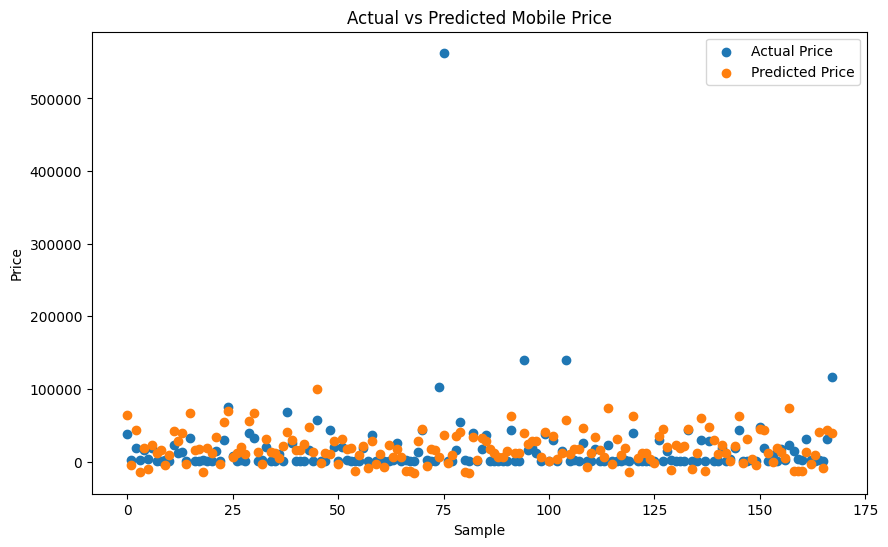

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, label="Actual Price")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted Price")
plt.xlabel("Sample")
plt.ylabel("Price")
plt.title("Actual vs Predicted Mobile Price")
plt.legend()
plt.show()

In [32]:
import pickle
with open("price_pred.pkl","wb") as f:
    pickle.dump(LR,f)
from google.colab import files
files.download('price_pred.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>